In [1]:
#разкомментировать при первом запуске
#!git clone https://github.com/TimmmofeyD/rzhd_hack.git
#%cd rzhd_hack/
#%ls
#!pip install -U torch torchvision
#!pip install -U opencv-python-headless
#!git clone https://github.com/ultralytics/yolov5
#%cd yolov5
#!pip install -r requirements.txt
#%cd ..
#%ls

In [2]:
#обучить тоже можно 1 раз
#!python /content/rzhd_hack/yolov5/train.py --img 640 --batch 16 --epochs 50 --data /content/rzhd_hack/data.yaml --weights yolov5s.pt

In [3]:
#запустить при первом запуске
#!sudo apt update
#!sudo apt install tesseract-ocr
#!sudo apt install libtesseract-dev
#!sudo apt-get install tesseract-ocr-rus
#!pip install pytesseract

In [4]:
import torch
from PIL import Image
import cv2
import pytesseract
import matplotlib.pyplot as plt
from IPython.display import display

In [5]:
model = torch.hub.load('/content/rzhd_hack/yolov5/', 'custom', path='/content/rzhd_hack/yolov5/runs/train/exp/weights/best.pt', source='local')

YOLOv5 🚀 v7.0-312-g1bcd17ee Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


In [37]:
img_path = '/content/rzhd_hack/images/train/title_20.png'

In [38]:
results = model(img_path)

In [39]:
results

YOLOv5 <class 'models.common.Detections'> instance
image 1/1: 606x450 10 text_blocks
Speed: 7.4ms pre-process, 7.1ms inference, 2.9ms NMS per image at shape (1, 3, 640, 480)

In [40]:
detected_blocks = results.xyxy[0].cpu().numpy()

In [41]:
image = Image.open(img_path)

In [42]:
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

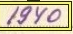

Detected text: 


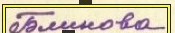

Detected text: 


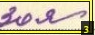

Detected text: 2



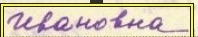

Detected text: 


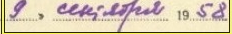

Detected text: |. › А 9.94



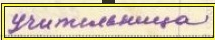

Detected text: [еее пеенев мене



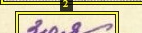

Detected text: бы @



Detected text: 


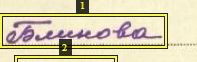

Detected text: ©



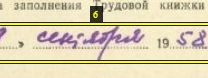

Detected text:  



In [43]:
for i, block in enumerate(detected_blocks):
    x1, y1, x2, y2, confidence, class_id = block
    x1, y1, x2, y2 = map(int, [x1, y1, x2, y2])

    cropped_img = image.crop((x1, y1, x2, y2))

    display(cropped_img)

    text = pytesseract.image_to_string(cropped_img, lang='rus')

    print(f'Detected text: {text}')